# Carbon in the ocean: practical

##

In [74]:
# Import packages
import PyCO2SYS as pyco2, numpy as np, xarray as xr
%matplotlib notebook
from matplotlib import pyplot as plt

# Import GLODAP gridded & mapped data
glodap = xr.Dataset()
glodap['alkalinity'] = xr.open_dataarray('data/GLODAPv2.2016b.TAlk_only.nc')
glodap['dic'] = xr.open_dataarray('data/GLODAPv2.2016b.TCO2_only.nc')
glodap['nitrate'] = xr.open_dataarray('data/GLODAPv2.2016b.NO3_only.nc')
glodap['salinity'] = xr.open_dataarray('data/GLODAPv2.2016b.salinity_only.nc')
glodap['temperature'] = xr.open_dataarray('data/GLODAPv2.2016b.temperature_only.nc')

# Pick out surface and bottom data
surface = glodap.bfill(dim='depth_surface').isel(depth_surface=0)
bottom = glodap.ffill(dim='depth_surface').isel(depth_surface=-1)

# Import climatological mean mixed layer depth and interpolate it to match the GLODAP grid
mld = xr.open_dataarray('data/mld_mean.nc').interp_like(surface)

<xarray.DataArray 'mld' (lat: 180, lon: 360)>
array([[        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       [        nan,         nan,         nan, ...,         nan,
                nan,         nan],
       ...,
       [95.33575773, 95.1252389 , 95.14020395, ...,         nan,
                nan,         nan],
       [94.89692307, 94.87339147, 94.83921369, ...,         nan,
                nan,         nan],
       [93.05504227, 93.05955124, 93.06381035, ...,         nan,
                nan,         nan]])
Coordinates:
  * lon      (lon) float64 20.5 21.5 22.5 23.5 24.5 ... 376.5 377.5 378.5 379.5
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5

<IPython.core.display.Javascript object>


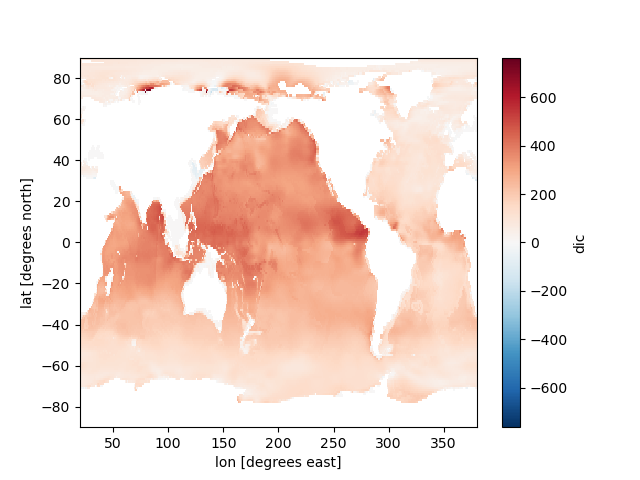

In [24]:
# Plot surface ocean properties
plt.figure()
(bottom.dic - surface.dic).plot()

<IPython.core.display.Javascript object>


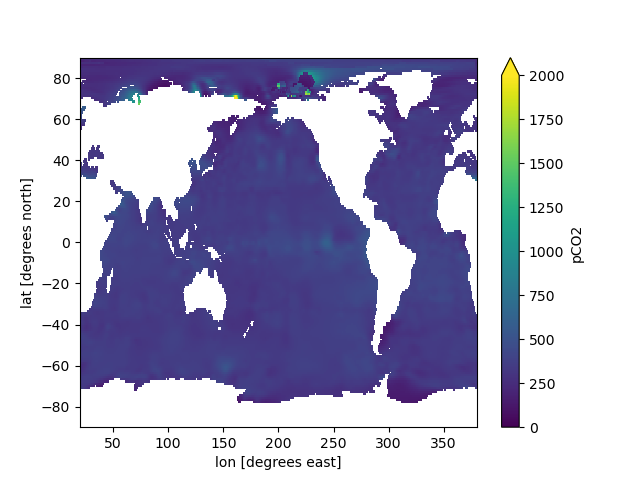

In [46]:
# Calculate initial surface ocean pCO2 with PyCO2SYS
results = pyco2.sys(
    surface.alkalinity.values, surface.dic.values, 1, 2,
    temperature=surface.temperature.values,
    salinity=surface.salinity.values,
)

# Add the new variable into the surface Dataset
surface['pCO2'] = (surface.dims, results['pCO2'])

# Plot surface ocean pCO2
plt.figure()
surface.pCO2.plot(vmin=0, vmax=2000)  # adjust vmin and vmax values to see detail

**What would be the effect of bringing all the nutrients from the bottom waters up to the surface on air-sea CO₂ exchange?**

<IPython.core.display.Javascript object>


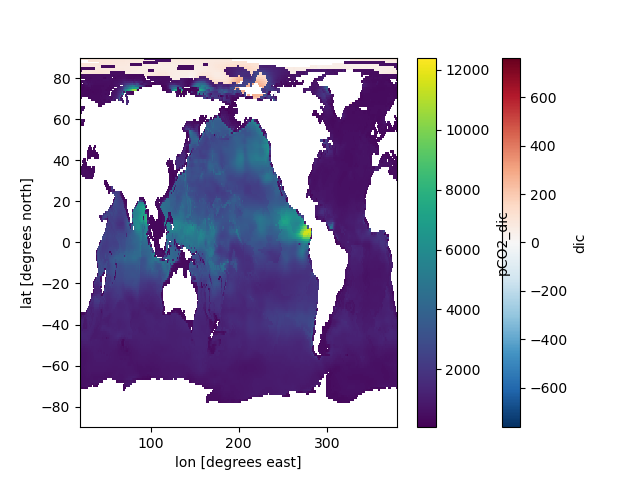

In [30]:
# First, just consider DIC
plt.figure()
(bottom.dic - surface.dic).plot()
# so there's more DIC in the bottom waters.

<IPython.core.display.Javascript object>


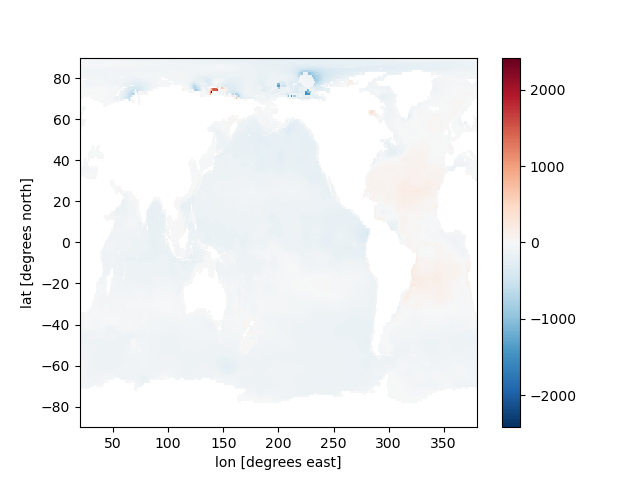

In [49]:
results_dic = pyco2.sys(
    bottom.alkalinity.values, surface.dic.values, 1, 2,
    temperature=surface.temperature.values,
    salinity=surface.salinity.values,
)
surface['pCO2_dic'] = (surface.dims, results_dic['pCO2'])

surface['dic_nitrate'] = surface.dic - (bottom.nitrate - surface.nitrate) * 117 / 16

plt.figure()
(surface.pCO2_dic - surface.pCO2).plot()
# (surface.dic_nitrate - surface.dic).plot()



## Southern Ocean iron limitation

